In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models


2025-04-12 09:49:00.341482: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-12 09:49:00.343982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 09:49:00.379816: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-12 09:49:00.381207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-12 09:49:04.188845: W tensorflow/compiler/tf2t

In [2]:
df = pd.read_csv("~//mini_project_full//herbal_component_similarity_matrix.csv",index_col=0)


# (Optional) Convert to float32 for efficiency
df = df.astype("float32")

# Show the shape and first few rows
print("Shape:", df.shape)
print(df.head())

Shape: (22273, 22273)
                                         sigmoidin B  xanthomicrol  \
sigmoidin B                                 1.000000      0.285714   
xanthomicrol                                0.285714      1.000000   
caffeidine acid                             0.126582      0.144928   
fructose 2-phosphorothioate 6-phosphate     0.168675      0.164384   
abyssinone V                                0.956522      0.292683   

                                         caffeidine acid  \
sigmoidin B                                     0.126582   
xanthomicrol                                    0.144928   
caffeidine acid                                 1.000000   
fructose 2-phosphorothioate 6-phosphate         0.117647   
abyssinone V                                    0.129870   

                                         fructose 2-phosphorothioate 6-phosphate  \
sigmoidin B                                                             0.168675   
xanthomicrol                

In [3]:
encoding_dim = 64  # Dimensionality of the latent space
learning_rate = 0.001
epochs = 50

In [5]:
input_dim = 22273  # Dimension of the input (SC and ST)
encoding_dim = 64  # Latent space dimension

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8192, activation='relu')(input_layer)
encoded = layers.Dense(2048, activation='relu')(encoded)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='relu')(encoded)  # Latent embedding


In [6]:

# Decoder
decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(2048, activation='relu')(decoded)
decoded = layers.Dense(8192, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Reconstruction

In [7]:
autoencoder = models.Model(input_layer, output_layer)

In [10]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


In [11]:
data=df.values
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
88/88 [==============================] - 34s 352ms/step - loss: 0.0444
Epoch 2/50
88/88 [==============================] - 33s 373ms/step - loss: 0.0412
Epoch 3/50
88/88 [==============================] - 31s 351ms/step - loss: 0.0412
Epoch 4/50
88/88 [==============================] - 27s 304ms/step - loss: 0.0412
Epoch 5/50
86/88 [============================>.] - ETA: 0s - loss: 0.0412

KeyboardInterrupt: 

In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

# Check if GPU is available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth to prevent TensorFlow from allocating all memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            
        # Limit the number of visible GPUs (in case you want to use a specific subset of GPUs)
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=10240)])  # Example: limit memory to 10GB for GPU 0
    except RuntimeError as e:
        print(e)
else:
    print("No GPUs available")

# Assuming `df` is your DataFrame with shape (22273, 22273)
# Convert the DataFrame to a numpy array
data = df.values  # Convert DataFrame to numpy array

# Define the input shape
input_dim = data.shape[1]  # Number of features (22273 in your case)
encoding_dim = 64  # Latent space dimension

# Encoder architecture
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(8192, activation='relu')(input_layer)
encoded = layers.Dense(2048, activation='relu')(encoded)
encoded = layers.Dense(512, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
latent = layers.Dense(encoding_dim, activation='relu')(encoded)

# Decoder architecture
decoded = layers.Dense(128, activation='relu')(latent)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(2048, activation='relu')(decoded)
decoded = layers.Dense(8192, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Build the autoencoder model
autoencoder = models.Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Use a GPU-based dataset pipeline if needed (e.g., TensorFlow dataset)
# For this example, we assume `data` is already in memory
# Train the model
autoencoder.fit(data, data, epochs=5, batch_size=256, shuffle=True)

# Define the encoder part for getting embeddings
encoder = models.Model(input_layer, latent)

# Get the compact embeddings for the DataFrame (df)
compact_df_embeddings = encoder.predict(data)

# Now `compact_df_embeddings` is the lower-dimensional representation


No GPUs available
Epoch 1/5
88/88 [==============================] - 30s 320ms/step - loss: 0.0443
Epoch 2/5
88/88 [==============================] - 28s 322ms/step - loss: 0.0412
Epoch 3/5
88/88 [==============================] - 28s 323ms/step - loss: 0.0412
Epoch 4/5
88/88 [==============================] - 29s 332ms/step - loss: 0.0412
Epoch 5/5
697/697 [==============================] - 8s 12ms/step


In [16]:
compact_df_embeddings = pd.DataFrame(compact_df_embeddings, columns=[f"feature_{i}" for i in range(encoding_dim)])
compact_df_embeddings.shape

(22273, 64)

In [17]:
compact_df_embeddings.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63
0,0.0,0.0,0.0,812.235596,4972.471191,0.0,0.0,7807.621582,0.0,2349.803955,...,2815.189209,0.0,0.0,1681.763550,2387.253418,0.0,4800.573730,1504.445801,6055.805176,4847.804688
1,0.0,0.0,0.0,863.911987,5286.992676,0.0,0.0,8301.435547,0.0,2498.325684,...,2993.219482,0.0,0.0,1788.235596,2538.106201,0.0,5104.089355,1599.367310,6438.541992,5154.166016
2,0.0,0.0,0.0,654.436401,4009.056396,0.0,0.0,6295.002930,0.0,1894.459839,...,2269.732422,0.0,0.0,1355.668945,1924.921021,0.0,3870.709229,1213.438232,4882.869629,3908.969238
3,0.0,0.0,0.0,583.472961,3573.190186,0.0,0.0,5610.561035,0.0,1688.516846,...,2022.988159,0.0,0.0,1208.350586,1715.496582,0.0,3449.864014,1081.432983,4351.916016,3483.855713
4,0.0,0.0,0.0,820.302612,5021.998535,0.0,0.0,7885.410156,0.0,2373.222412,...,2843.238525,0.0,0.0,1698.505127,2411.049316,0.0,4848.419922,1519.463501,6116.157715,4896.130371


In [18]:
compact_df_embeddings.to_csv("~//mini_project_full//herbal_component_similarity_matrix_embeddings.csv", index=False)

In [22]:
from sklearn.metrics import mean_squared_error
embeddings = encoder.predict(df.values)

# Get the reconstruction from the decoder part
reconstructed = autoencoder.predict(df.values)

# Calculate Mean Squared Error for the reconstruction (Decoder's performance)
reconstruction_error = mean_squared_error(df.values, reconstructed)
print(f"Reconstruction Error (MSE) = {reconstruction_error}")

697/697 [==============================] - 14s 21ms/step
Reconstruction Error (MSE) = 0.041215989738702774


In [26]:
df.values

array([[1.        , 0.2857143 , 0.12658228, ..., 0.24347825, 0.21978022,
        0.17699115],
       [0.2857143 , 1.        , 0.14492753, ..., 0.17142858, 0.17283951,
        0.13592233],
       [0.12658228, 0.14492753, 1.        , ..., 0.14      , 0.10526316,
        0.08163265],
       ...,
       [0.24347825, 0.17142858, 0.14      , ..., 1.        , 0.19642857,
        0.29850745],
       [0.21978022, 0.17283951, 0.10526316, ..., 0.19642857, 1.        ,
        0.18181819],
       [0.17699115, 0.13592233, 0.08163265, ..., 0.29850745, 0.18181819,
        1.        ]], dtype=float32)

In [25]:
print(reconstructed)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


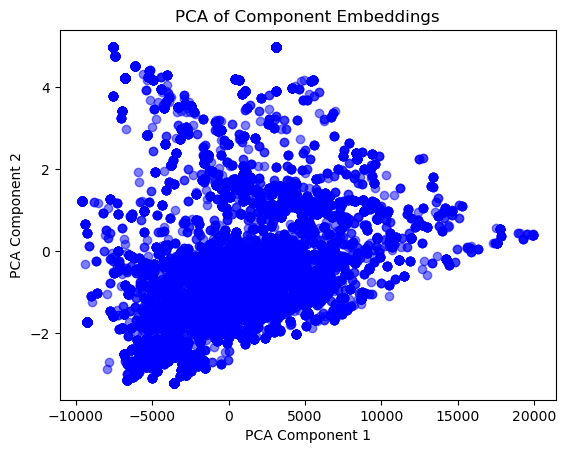

Embeddings saved as 'compact_embeddings.csv'
Embeddings saved as 'compact_embeddings.npy'


KeyboardInterrupt: 

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', alpha=0.5)
plt.title("PCA of Component Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Save the embeddings and the reconstructed data
embedding_df = pd.DataFrame(embeddings)  # Convert to DataFrame for readability
embedding_df.to_csv('compact_embeddings.csv', index=False)
print("Embeddings saved as 'compact_embeddings.csv'")

# Optionally, save embeddings as a NumPy file
np.save('compact_embeddings.npy', embeddings)
print("Embeddings saved as 'compact_embeddings.npy'")

# Save the reconstructed data
reconstructed_df = pd.DataFrame(reconstructed)
reconstructed_df.to_csv('reconstructed_data.csv', index=False)
print("Reconstructed data saved as 'reconstructed_data.csv'")

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Load your similarity matrix (df)
# df = pd.read_csv("your_file.csv")  # If you need to load it

# 1. Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df.values)

# 2. Define input shape and encoding dimension
input_dim = data_scaled.shape[1]  # 22273
encoding_dim = 64

# 3. Build the autoencoder model
# Encoder
input_layer = layers.Input(shape=(input_dim,))
x = layers.Dense(8192, activation='relu')(input_layer)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
latent = layers.Dense(encoding_dim, activation='relu')(x)

# Decoder
x = layers.Dense(128, activation='relu')(latent)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(8192, activation='relu')(x)
output_layer = layers.Dense(input_dim, activation='sigmoid')(x)

autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

# 4. Compile the model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    loss='mean_squared_error')

# 5. Train the model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

autoencoder.fit(data_scaled, data_scaled,
                epochs=50,
                batch_size=256,
                shuffle=True,
                callbacks=[early_stop])

# 6. Define encoder model to extract embeddings
encoder = models.Model(inputs=input_layer, outputs=latent)

# 7. Get compact embeddings
compact_embeddings = encoder.predict(data_scaled, batch_size=256)

# 8. Evaluate performance (MSE)
reconstructed = autoencoder.predict(data_scaled, batch_size=256)
mse = np.mean(np.square(data_scaled - reconstructed))
print(f"\nReconstruction Error (MSE) = {mse}")

# 9. Save the embeddings (optional)
np.save("component_embeddings.npy", compact_embeddings)  # For future use


Epoch 1/50
88/88 [==============================] - 33s 349ms/step - loss: 0.0209
Epoch 2/50
88/88 [==============================] - 29s 334ms/step - loss: 0.0065
Epoch 3/50
88/88 [==============================] - 28s 322ms/step - loss: 0.0041
Epoch 4/50
88/88 [==============================] - 28s 316ms/step - loss: 0.0034
Epoch 5/50
88/88 [==============================] - 28s 321ms/step - loss: 0.0023
Epoch 6/50
88/88 [==============================] - 28s 316ms/step - loss: 0.0018
Epoch 7/50
88/88 [==============================] - 30s 340ms/step - loss: 0.0016
Epoch 8/50
88/88 [==============================] - 31s 349ms/step - loss: 0.0014
Epoch 9/50
88/88 [==============================] - 27s 309ms/step - loss: 0.0014
Epoch 10/50
88/88 [==============================] - 28s 320ms/step - loss: 0.0010
Epoch 11/50
88/88 [==============================] - 27s 308ms/step - loss: 0.0010
Epoch 12/50
88/88 [==============================] - 27s 309ms/step - loss: 8.7820e-04
Epoch 13/

In [28]:
reconstructed

array([[0.6832879 , 0.296117  , 0.13347568, ..., 0.22615488, 0.2631922 ,
        0.20427321],
       [0.26805758, 0.719861  , 0.15155756, ..., 0.17362568, 0.18290854,
        0.14538346],
       [0.12162772, 0.16016403, 0.35471398, ..., 0.13883308, 0.12016307,
        0.09467448],
       ...,
       [0.23202041, 0.17592846, 0.1395755 , ..., 0.5596194 , 0.19502498,
        0.36685485],
       [0.2146539 , 0.17991893, 0.10833447, ..., 0.20630051, 0.89037853,
        0.19435884],
       [0.18898687, 0.14420117, 0.09968769, ..., 0.32429704, 0.17103568,
        0.56630206]], dtype=float32)

In [32]:
compact_embeddings

array([[0.        , 0.        , 0.        , ..., 0.09093965, 0.        ,
        0.        ],
       [0.        , 0.        , 1.8859849 , ..., 0.21488239, 0.        ,
        0.51758873],
       [0.        , 0.        , 1.3620697 , ..., 0.58340895, 0.        ,
        1.2026502 ],
       ...,
       [0.        , 0.        , 1.0844512 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.3231447 , ..., 0.99618065, 0.        ,
        0.        ],
       [0.        , 0.        , 1.114832  , ..., 1.2179717 , 0.        ,
        0.        ]], dtype=float32)

In [31]:
embedding_df = pd.DataFrame(compact_embeddings, index=df.index)
embedding_df.to_csv("component_embeddings.csv")